In [1]:
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories
, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories
, shuffle = True, random_state = None)

(array([584.,   0., 591.,   0.,   0., 590.,   0.,   0., 578.,   0.,   0.,
        594.,   0.,   0., 598.,   0.,   0., 597.,   0., 600.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <a list of 20 Patch objects>)

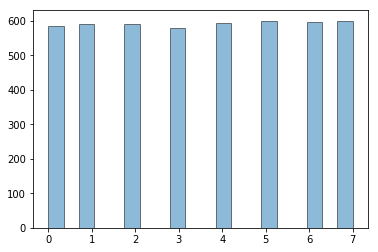

In [3]:
from matplotlib import pyplot as plt
import numpy as np
plt.hist(train_dataset.target,bins=20, alpha=0.5, histtype='bar', ec='black')

In [4]:
import nltk
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')

wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit())

In [6]:
vectorizer = CountVectorizer(min_df=3, 
                             analyzer=stem_rmv_punc, 
                             stop_words='english')

# fit_tranform train data
X_train_counts = vectorizer.fit_transform(train_dataset.data)
print("train count size ", X_train_counts.shape)


X_test_counts = vectorizer.transform(test_dataset.data)
print("test count size ", X_test_counts.shape)

# vectorizer.get_feature_names()

train count size  (4732, 16600)
test count size  (3150, 16600)


In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_tranform train data
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
print('-' * 20)
print(X_train_counts.toarray()[:10,:5])
print('-' * 20)
print(X_train_tfidf.toarray()[:10,:5])

# transform test data
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)
print('-' * 20)
print(X_test_counts.toarray()[:10,:5])
print('-' * 20)
print(X_test_tfidf.toarray()[:10,:5])

(4732, 16600)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(3150, 16600)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


#### Question3

LSI to the TF-IDF matrix with k=50, we'll use X_train_reduced as dim_reduced data matrix

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
print(X_train_reduced.shape)

(4732, 50)


mapping x_train_reduced back to m*n matrix to calculate norm

In [9]:
X_train_LSI=svd.inverse_transform(X_train_reduced)

In [10]:
np.sum(np.array(X_train_tfidf - X_train_LSI)**2)

3895.6016689020935

NMF(k=50),    we'll use W_train as dim_reduced data matrix

In [11]:
from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=0)
W_train = model.fit_transform(X_train_tfidf)

print(W_train.shape)

(4732, 50)


calculate error for NMF

In [12]:
H = model.components_
np.sum(np.array(X_train_tfidf - W_train.dot(H))**2)

3940.5577667857333

#### Question6

In [13]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train_tfidf.toarray(), train_dataset.target)

In [14]:
X_new_counts = vectorizer.transform(test_dataset.data)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [15]:
predicted = clf.predict(X_new_tfidf.toarray())

In [16]:
print(len(test_dataset.target))
test_dataset.target[0]

3150


7

In [17]:
print(len(predicted))
predicted[0]

3150


7

In [20]:
train_dataset.bintarget = np.zeros_like(train_dataset.target)
test_dataset.bintarget = np.zeros_like(test_dataset.target)
for y in [6, 7, 4, 2]:
    train_dataset.bintarget[np.argwhere(train_dataset.target == y)] = 0
    test_dataset.bintarget[np.argwhere(test_dataset.target == y)] = 0
for y in [1, 3, 0, 5]:
    train_dataset.bintarget[np.argwhere(train_dataset.target == y)] = 1
    test_dataset.bintarget[np.argwhere(test_dataset.target == y)] = 1
class_names = ['Computer Technology', 'Recreational Activity']
#print(train_dataset.bintarget[:20])

In [22]:
pred = np.zeros_like(predicted)
for y in [6, 7, 4, 2]:
    pred[np.argwhere(predicted == y)] = 0
for y in [1, 3, 0, 5]:
    pred[np.argwhere(predicted == y)] = 1
class_names = ['Computer Technology', 'Recreational Activity']
#print(train_dataset.bintarget[:20])

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [26]:
print('accuracy:', accuracy_score(test_dataset.bintarget, pred))
print('recall:', recall_score(test_dataset.bintarget, pred))
print('precision:', precision_score(test_dataset.bintarget, pred))
print('f1_score:', f1_score(test_dataset.bintarget, pred))

accuracy: 0.8422222222222222
recall: 0.8448275862068966
precision: 0.8389346861128726
f1_score: 0.8418708240534521
